# Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("datasets/spotify_music.csv")

In [23]:
# data.iloc[1500]
data.describe()

,Rank,Streams,Explicit,Track_number_on_album,Artist_followers,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence
count,4247.000000,4.247000e+03,4247.000000,4247.000000,4.247000e+03,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000
mean,87.220391,9.991090e+06,0.446668,4.466211,1.494934e+07,0.225022,0.688924,0.635774,0.009960,0.177312,-6.308090,0.129370,122.247086,0.571698,5.247940,0.488441
std,58.883576,7.635629e+06,0.497206,4.926232,1.618903e+07,0.236764,0.139260,0.162323,0.064362,0.134594,2.507428,0.117828,29.926934,0.494891,3.658011,0.222670
min,1.000000,2.525159e+06,0.000000,1.000000,9.000000e+00,0.000025,0.150000,0.027900,0.000000,0.019700,-34.475000,0.023200,46.718000,0.000000,0.000000,0.032000
25%,34.000000,5.181312e+06,0.000000,1.000000,3.280170e+06,0.042600,0.606000,0.537000,0.000000,0.096950,-7.428000,0.046000,97.958000,0.000000,1.000000,0.317000
50%,80.000000,7.199130e+06,0.000000,2.000000,7.878088e+06,0.137000,0.705000,0.649000,0.000000,0.124000,-5.943000,0.078700,120.013000,1.000000,5.000000,0.483000
75%,137.500000,1.205281e+07,1.000000,7.000000,2.157105e+07,0.328000,0.789000,0.756000,0.000024,0.212000,-4.681000,0.178000,142.984000,1.000000,8.000000,0.660000
max,200.000000,7.146787e+07,1.000000,76.000000,7.896787e+07,0.994000,0.980000,0.978000,0.953000,0.962000,1.509000,0.966000,212.117000,1.000000,11.000000,0.982000


In [26]:
features = ['Explicit','Artist_followers','Track_number_on_album','Acousticness','Danceability','Energy','Liveness','Loudness','Speechiness','Tempo','Mode','Key','Valence']
label = ['Rank']

<AxesSubplot:>

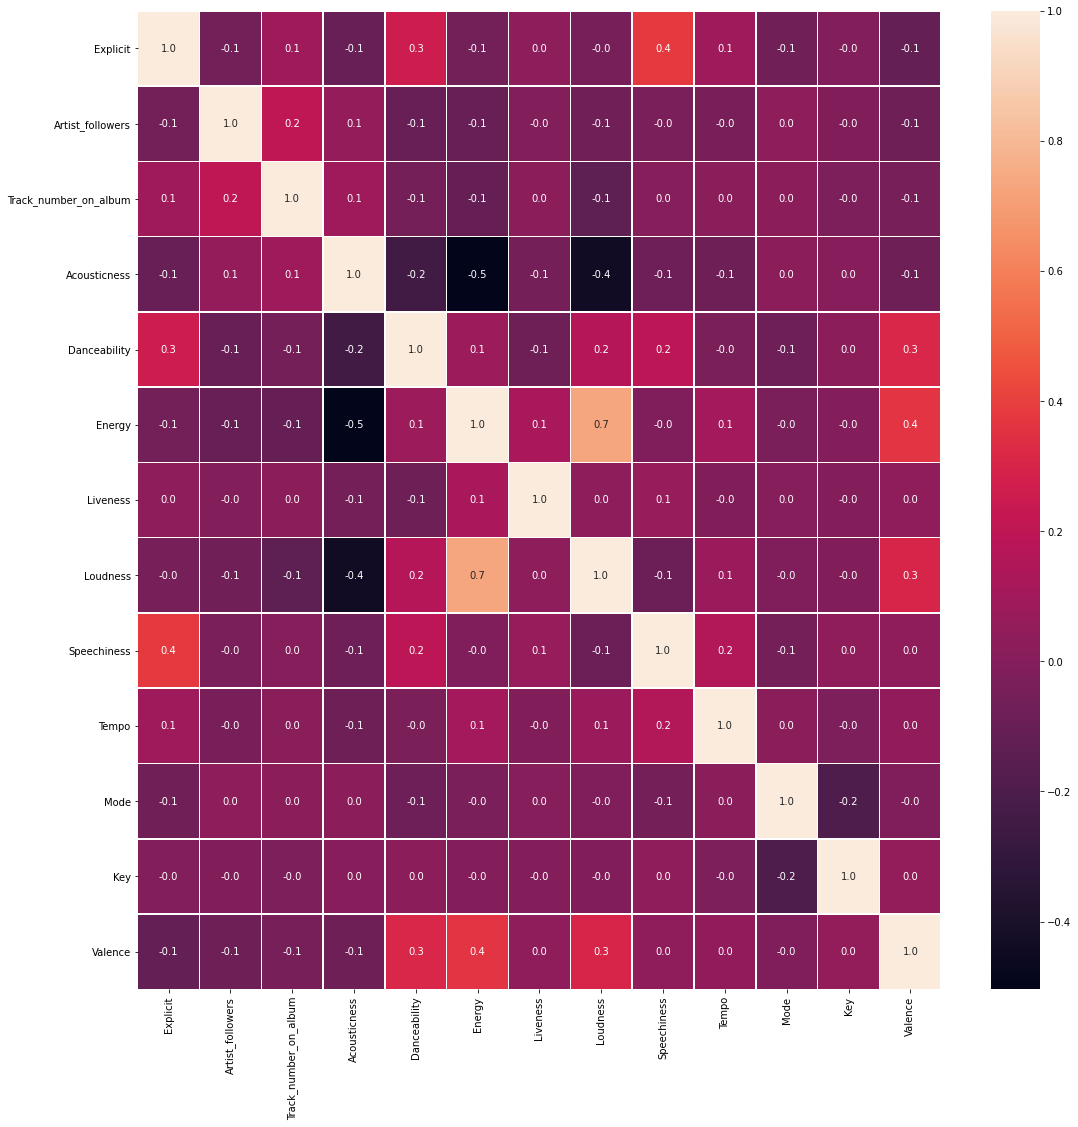

In [27]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data[features].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Mean value for Explicit : 0.44666823640216624


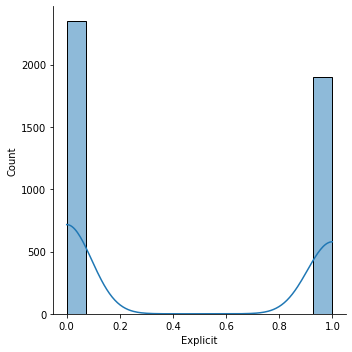

Mean value for Artist_followers : 14949337.932187427


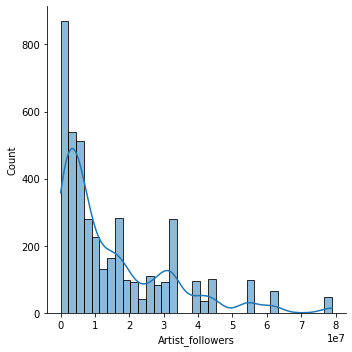

Mean value for Track_number_on_album : 4.466211443371792


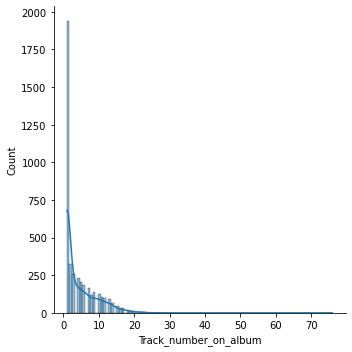

Mean value for Acousticness : 0.22502158994584412


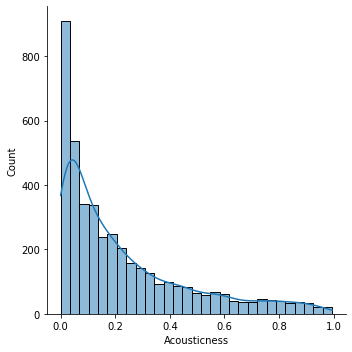

Mean value for Danceability : 0.6889239463150458


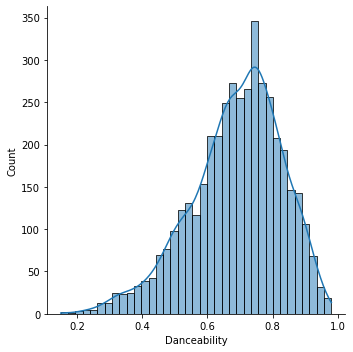

Mean value for Energy : 0.6357740287261596


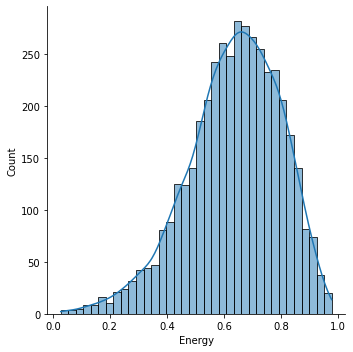

Mean value for Liveness : 0.17731191429244172


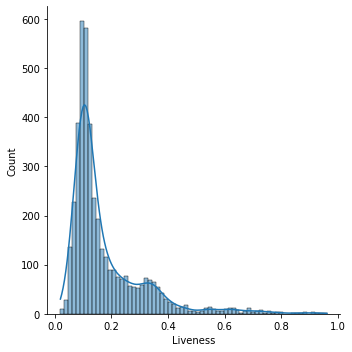

Mean value for Loudness : -6.3080901813044505


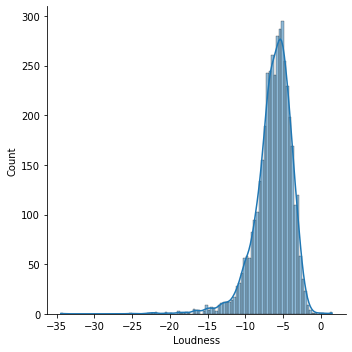

Mean value for Speechiness : 0.12937014363079818


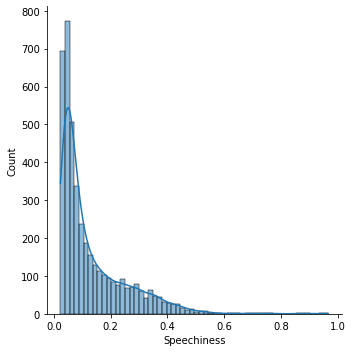

Mean value for Tempo : 122.24708570755828


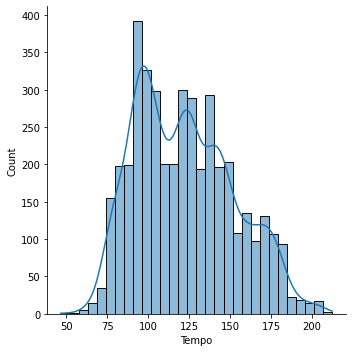

Mean value for Mode : 0.5716976689427832


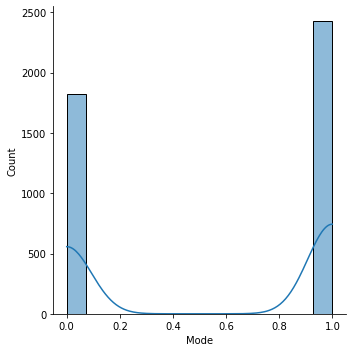

Mean value for Key : 5.247939722156817


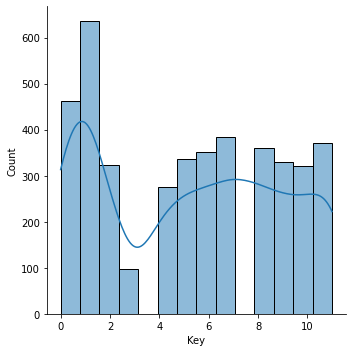

Mean value for Valence : 0.4884405698139864


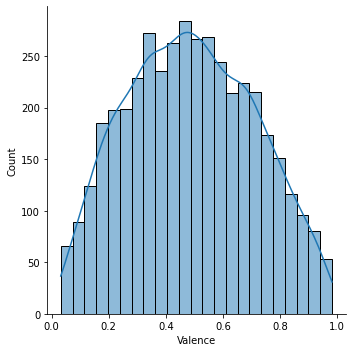

In [30]:
for f in features:
    print(f"Mean value for {f.capitalize()} :", data[f].mean())
    sns.displot(data[f], kde=True)
    plt.savefig(f'plots/{f}.png')
    plt.show()

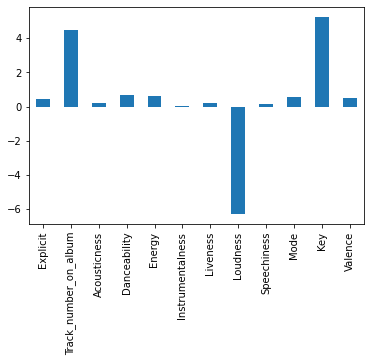

In [31]:
data.drop(['Streams', 'Artist_followers', 'Tempo', 'Rank'], axis=1).mean().plot.bar()
plt.show()

In [18]:
# data.columns = [i.capitalize() for i in data.columns]

In [20]:
# data.to_csv('datasets/spotify_music.csv', index=False)

In [39]:
#map the numeric values of key to notes
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
data['Key'] = data['Key'].map(key_mapping)

sns.countplot(x = 'Key', data=data, order=data['Key'].value_counts().index)
plt.title("Count of Song Keys")
plt.show()

ValueError: Could not interpret input 'Key'

In [33]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(data[features])
X_embedded.shape

(4247, 3)

In [35]:
sns.set_style('ticks')
sns.lmplot(
    x='_DIM_1_',
    y='_DIM_2_',
    data = X_embedded,
    fit_reg=False,
    legend=True,
    hue='Label',
)

C:\Python38\lib\site-packages\seaborn\regression.py:585: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[cols]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [40]:
data.head()

,Id,Rank,Track,Artist,Streams,Week,Album_name,Explicit,Track_number_on_album,Artist_followers,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,1,Starboy,The Weeknd,25734078,2017-01-06,Starboy,1,1,31348348,...,0.681,0.594,0.000003,0.134,-7.028,0.2820,186.054,1,NaN,0.5350
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2,Closer,The Chainsmokers,23519705,2017-01-06,Closer,0,1,17742887,...,0.748,0.524,0.000000,0.111,-5.599,0.0338,95.010,1,NaN,0.6610
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),0,1,4296325,...,0.720,0.763,0.000000,0.180,-4.068,0.0523,101.965,0,NaN,0.7420
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,4,Let Me Love You,DJ Snake,19852704,2017-01-06,Encore,0,13,7312319,...,0.476,0.718,0.000010,0.122,-5.309,0.0576,199.864,1,NaN,0.1420
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,2,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,30752312,2017-02-17,I Don’t Wanna Live Forever (Fifty Shades Darker),0,1,15423979,...,0.735,0.451,0.000013,0.325,-8.374,0.0585,117.973,1,NaN,0.0862
